In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score, f1_score, recall_score
import matplotlib.pyplot as plt
from sklearn.utils import resample
import numpy as np


In [13]:
# load dataset
df = pd.read_csv("bank-full.csv")


#Converting classes into Numeric Values
df['housing'].replace(['no', 'yes' , 'unkown'],[0, 1,-1], inplace=True)
df['loan'].replace(['no', 'yes' , 'unkown'],[0, 1,-1], inplace=True)
df['job'].replace(["admin.","unknown","unemployed","management","housemaid","entrepreneur"
,"student","blue-collar","self-employed","retired","technician","services"],
[1,2,3,4,5,6,7,8,9,10,11,12],inplace=True)
df['marital'].replace(["married","divorced","single"],[1,2,3],inplace=True)
df['education'].replace(["unknown","secondary","primary","tertiary"],[0,1,2,3],inplace=True)
df['default'].replace(['no', 'yes' , 'unkown'],[0, 1,-1], inplace=True)
df['contact'].replace(["unknown","telephone","cellular"],[0, 1,2], inplace=True)
df['poutcome'].replace(["unknown","other","failure","success"],[0,1,2,3],inplace=True)
df['y'].replace(['no', 'yes' , 'unkown'],[0, 1,-1], inplace=True)
df=df.drop(['month'], axis = 1)



print(df.head)

<bound method NDFrame.head of        age  job  marital  education  ...  pdays  previous  poutcome  y
0       58    4        1          3  ...     -1         0         0  0
1       44   11        3          1  ...     -1         0         0  0
2       33    6        1          1  ...     -1         0         0  0
3       47    8        1          0  ...     -1         0         0  0
4       33    2        3          0  ...     -1         0         0  0
...    ...  ...      ...        ...  ...    ...       ...       ... ..
45206   51   11        1          3  ...     -1         0         0  1
45207   71   10        2          2  ...     -1         0         0  1
45208   72   10        1          1  ...    184         3         3  1
45209   57    8        1          1  ...     -1         0         0  0
45210   37    6        1          1  ...    188        11         1  0

[45211 rows x 16 columns]>


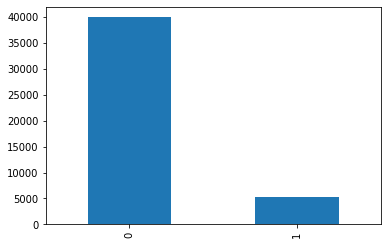

In [14]:
df['y'].value_counts(normalize=True)

df['y'].value_counts().plot(kind='bar')


0    39922
1    36548
Name: y, dtype: int64


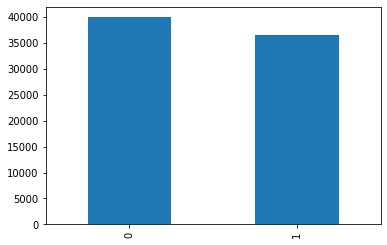

In [15]:
#Balance dataset

df_majority = df[df.y==0]
df_minority = df[df.y==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,      # sample with replacement
                                 n_samples=36548)   # to match majority class
                              
 
#Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
print(df_upsampled['y'].value_counts())
df_upsampled['y'].value_counts().plot(kind='bar')

In [16]:
x = df_upsampled.drop('y', axis=1)
y= df_upsampled['y']

print(x)
print(y)

       age  job  marital  education  ...  campaign  pdays  previous  poutcome
0       58    4        1          3  ...         1     -1         0         0
1       44   11        3          1  ...         1     -1         0         0
2       33    6        1          1  ...         1     -1         0         0
3       47    8        1          0  ...         1     -1         0         0
4       33    2        3          0  ...         1     -1         0         0
...    ...  ...      ...        ...  ...       ...    ...       ...       ...
31392   46    4        2          3  ...         2     -1         0         0
41739   29    1        3          1  ...         1     -1         0         0
40779   30    4        3          3  ...         3    102         2         3
37788   32    8        3          1  ...         1     -1         0         0
31149   71   10        1          3  ...         1     -1         0         0

[76470 rows x 15 columns]
0        0
1        0
2        0
3   

In [17]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

In [18]:
#scaling data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_test)

[[-1.37636889 -0.81855365 -0.81921252 ... -0.4846593  -0.33541245
  -0.54591612]
 [-1.12233544  0.30436776  1.39606155 ... -0.4846593  -0.33541245
  -0.54591612]
 [ 0.06315402 -1.66074471 -0.81921252 ... -0.4846593  -0.33541245
  -0.54591612]
 ...
 [-1.12233544  0.58509811  1.39606155 ...  0.4244235   0.07646238
   2.39438892]
 [ 1.24864347 -0.81855365  0.28842451 ... -0.4846593  -0.33541245
  -0.54591612]
 [-0.9529798  -0.25709295 -0.81921252 ... -0.4846593  -0.33541245
  -0.54591612]]


In [19]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print(y_pred)

[1 1 0 ... 1 1 0]


In [20]:
    #  ConfusionMatrix{ TruePositive     FalsePositive
    #                   FalseNegative    TrueNegative    }

Confusion_Matrix = confusion_matrix(y_test, y_pred)
TP = Confusion_Matrix[0][0]  #TruePositive
FP = Confusion_Matrix[0][1]  #FalsePositive
FN = Confusion_Matrix[1][0]  #FalseNegative
TN = Confusion_Matrix[1][1]  #TrueNegative


print(pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True),"\n")

print("ConfusionMatrix \n",Confusion_Matrix,"\n")


Accuracy = (TP + TN) / (TP + FP + TN +FN)
print("Calculated Accuracy", Accuracy,"\n")




Predicted     0     1    All
Actual                      
0          6386  1518   7904
1           331  7059   7390
All        6717  8577  15294 

ConfusionMatrix 
 [[6386 1518]
 [ 331 7059]] 

Calculated Accuracy 0.8791029161762782 



In [21]:
print("Precision = ",precision_score(y_test, y_pred))
print("Recall = ",recall_score(y_test, y_pred))
print("F1 Score = ",f1_score(y_test, y_pred))
print("Ready made Accuracy Function = ",accuracy_score(y_test, y_pred))


Precision =  0.8230150402238545
Recall =  0.9552097428958052
F1 Score =  0.884198659735705
Ready made Accuracy Function =  0.8791029161762782


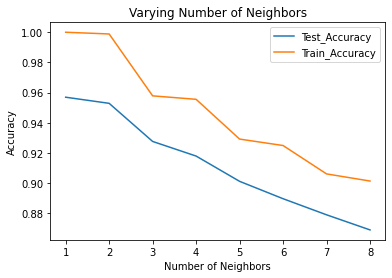

In [22]:
valueRangeof_Neighbors = np.arange(1, 9)
Train_Accuracy = np.empty(len(valueRangeof_Neighbors))
Test_Accuracy = np.empty(len(valueRangeof_Neighbors))

for i, k in enumerate(valueRangeof_Neighbors):
    knn = KNeighborsClassifier(n_neighbors=k) # We instantiate the classifier
    knn.fit(X_train,y_train) # Fit the classifier to the training data
    Train_Accuracy[i] = knn.score(X_train, y_train) # Compute accuracy on the training set    
    Test_Accuracy[i] = knn.score(X_test, y_test) # Compute accuracy on the testing set

# Visualization of k values vs accuracy

plt.title('Varying Number of Neighbors')
plt.plot(valueRangeof_Neighbors, Test_Accuracy, label = 'Test_Accuracy')
plt.plot(valueRangeof_Neighbors, Train_Accuracy, label = 'Train_Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()